# **Prediction Using Unsupervised Machine Learning**
## **Task 1**

In [1]:
# IMPORTING ALL THE REQUIRED LIBRARIES 
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
# LOADING THE DATASET
dataset = datasets.load_iris()
dataset_df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
dataset_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


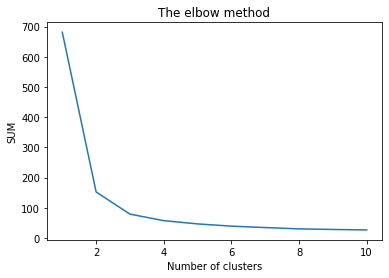

In [6]:
# FINDING THE APPROPRIATE NUMBER OF CLUSTERS TO PERFORM K-MEANS CLASSIFICATION

x = dataset_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
sum = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    sum.append(kmeans.inertia_)
    
# PLOTTING THE RESULTS OMTO A LINE GRAPH 

plt.plot(range(1, 11), sum)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SUM') 
plt.show()

In [7]:
# CREATING THHE K-MEANS CLASSIFIER

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

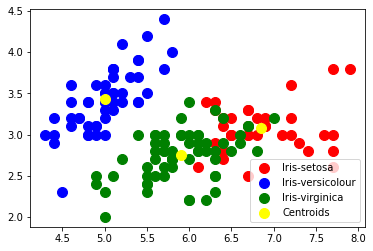

In [8]:
# VISUALISING THE CLUSTERS 

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()